In [1]:
#Implementação do algoritmo DBSCAN em Python
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.datasets import make_blobs#biblioteca pra data-sets sinteticos
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

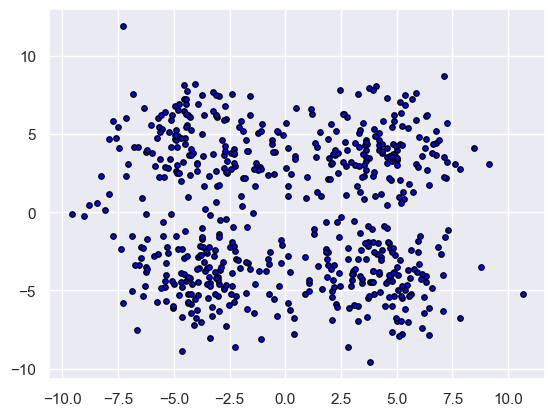

In [2]:
#Clusters
#4 grupos
centers = [(-4, -4), (-4,4), (4,-4),  (4, 4)]
cluster_std = 2 #o quão separado esses grupos estão


X, y = make_blobs(n_samples=600, #600 valores
                  cluster_std=cluster_std, 
                  centers=centers, #centro dos clusters
                  n_features=2,  #colunas
                  random_state=1)


plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', s=15);

In [4]:
#Raio =  1, quantidade minima de pontos = min_sample
db = DBSCAN(eps=1, min_samples=7).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)#quantidade de cluster pra visualizar
n_noise_ = list(labels).count(-1) #quantos ruidos

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 4
Número de Ruídos: 73


In [3]:
#função para visualizar os grupos que o dbscan encontrar
def plot_db(X, labels):#x =variaveis/features da base de dados, labels=representação de grupos
    df_db = pd.DataFrame(X)#criando dataframe com as variaveis
    df_db['cluster'] = labels#colocando os labels no dataframe

    sns.scatterplot(data=df_db,
                    x=0, y=1,
                    hue="cluster", 
                    palette="deep");

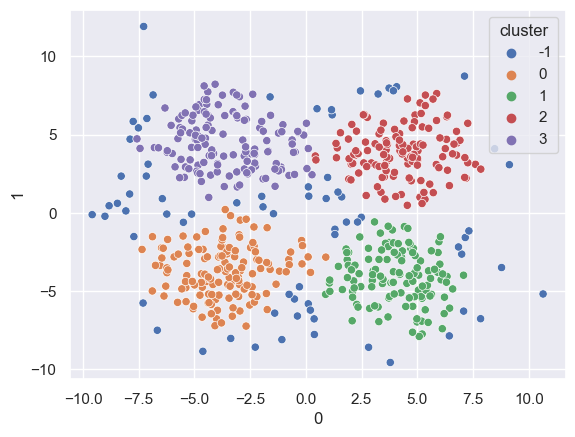

In [5]:
#utilizando a função
plot_db(X, labels)

In [6]:
#Clusters naturais
from sklearn.datasets import make_moons

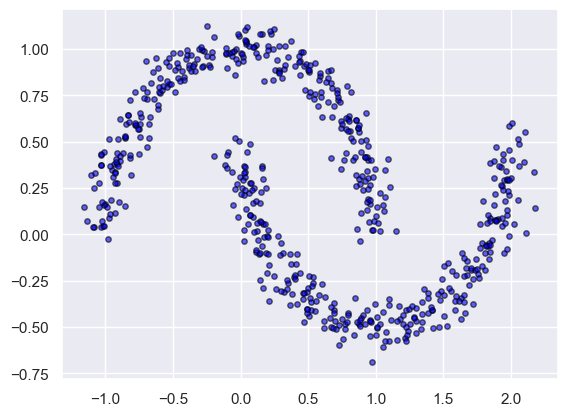

In [7]:
#criando base de dados
X, y = make_moons(600, noise=0.07, random_state=1)
plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', alpha=.6, s=15);

In [8]:
#raio = 2 com minimo de pontos 4
db = DBSCAN(eps=.2, min_samples=4).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 2
Número de Ruídos: 0


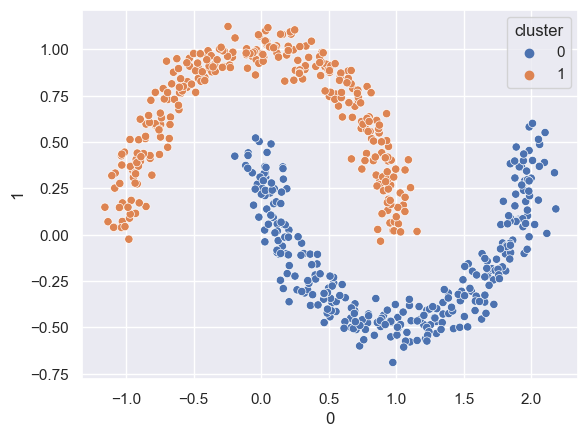

In [9]:
#visualização de clusters em cores separadas
plot_db(X, labels)

In [10]:
#implementação OPTICS em Python
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS

from sklearn import metrics

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

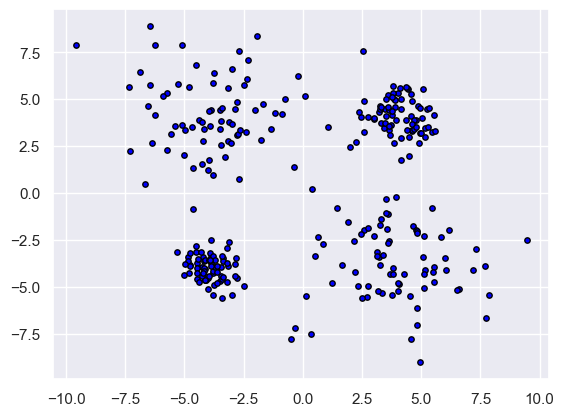

In [11]:
#definir bases
centers = [(-4, -4), (-4,4), (4,-4),  (4, 4)]
cluster_std = [.7, 2, 1.8, .9]#valor diferente de dispersão pra cada grupo

# n_samples=300
X, y = make_blobs(n_samples=300, #quantidade de elementos
                  cluster_std=cluster_std, #dispersão
                  centers=centers, #valor dos centro
                  n_features=2, #quantidade de variaveis
                  random_state=1)#gerar a mesma quantidade de ponto pra cad agrupo

plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', s=15);

In [12]:
#função
def plot_db(X, labels): #X=valores gerados, label = classificação dos clusters
    df_db = pd.DataFrame(X)
    df_db['cluster'] = labels

    sns.scatterplot(data=df_db,
                    x=0, y=1,
                    hue="cluster", 
                    palette="deep");

In [13]:
#Raio = 0,05
#tamanho minimo dos clustesr 0,05
clust = OPTICS(min_samples=30, xi=0.05, min_cluster_size=0.05)

# Run the fit
opt = clust.fit(X)
labels = opt.labels_ #valor dos labels

# numero de clusters nas labels, ignora ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 4
Número de Ruídos: 26


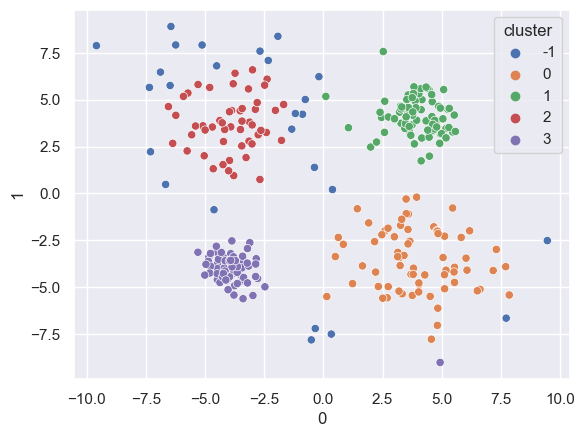

In [14]:
#usando a função
plot_db(X, labels)

Número de Clusters: 6
Número de Ruídos: 39


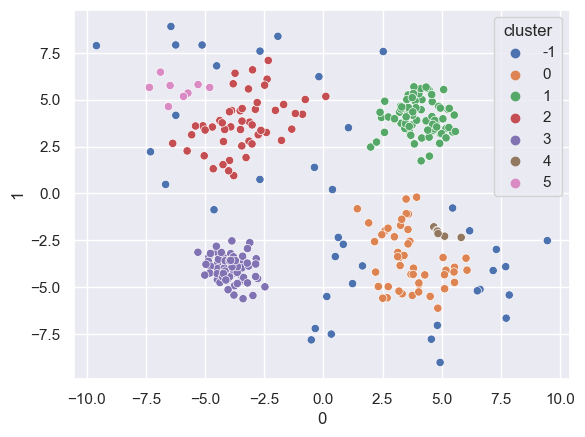

In [15]:
#usando algoritmo dbscan pra ver como ele funciona na base

#valor de raio = 1, min_samples = 5(quantidade de pontos que precisa ter para ser core)
db = DBSCAN(eps=1, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

plot_db(X, labels)

#Dbscan lida melhor com  densidade não variada dos grupos
#optics lida melhor com densidade variada dos grupos

In [16]:
#clusterização baseada em densidade na prática:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

In [17]:
#analisando a base de pinguins
data = pd.read_csv('c:/csv/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [18]:
#checando quantos valores nulls existe
data.isnull().sum()

especie          0
ilha             0
comp_bico_mm     2
larg_bico_mm     2
comp_asa_mm      2
peso_gr          2
sexo            10
dtype: int64

In [19]:
#apagando valores nulos
data = data.dropna()

C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\g

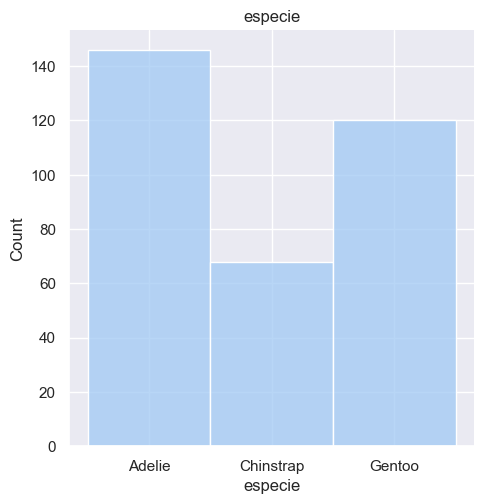

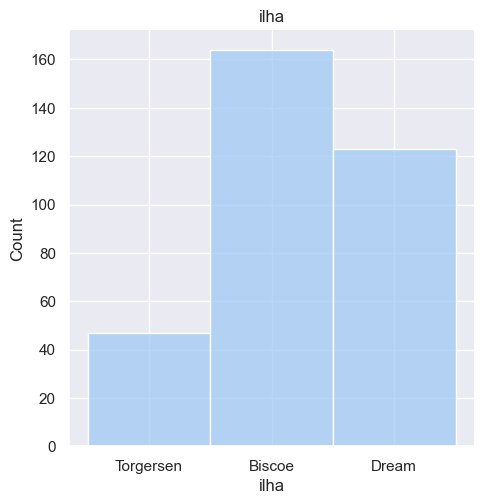

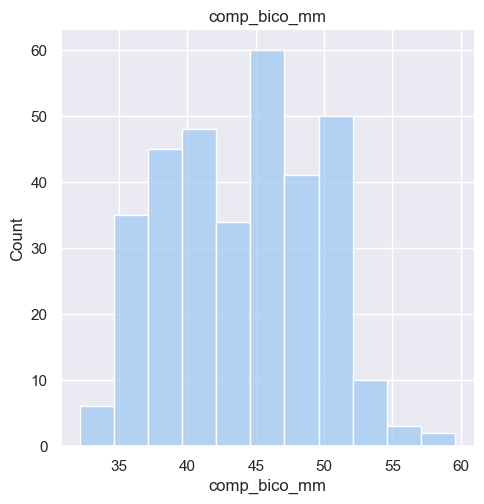

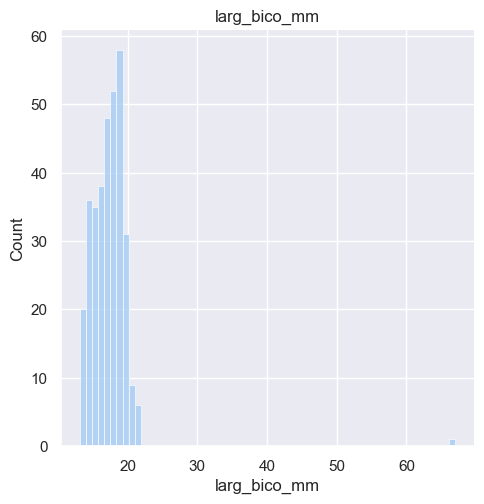

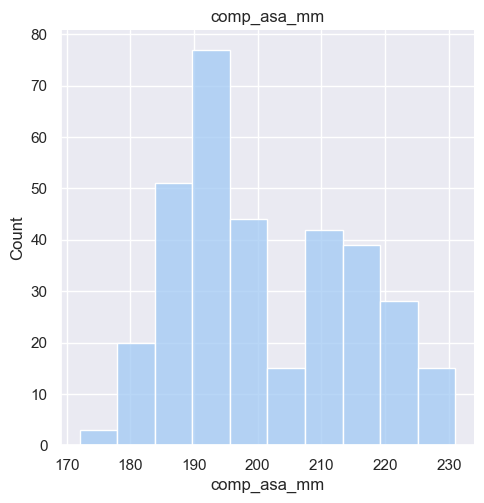

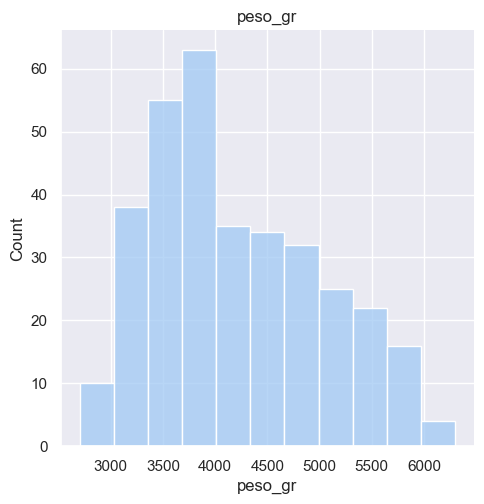

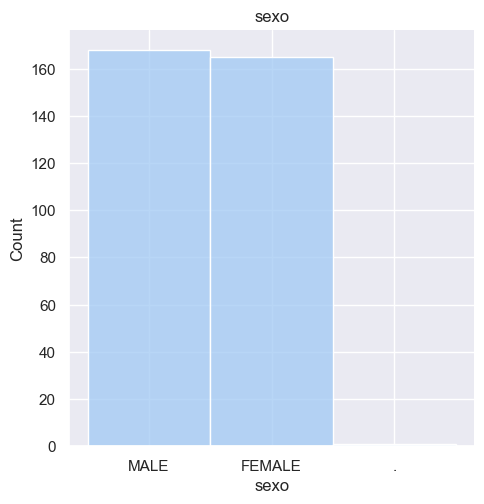

In [20]:
#visualizando a distribuição das colunas
for c in data.columns:
    sns.displot(data[c]).set(title=c)
    plt.plot();

In [21]:
#unico outlier observado foi nos bicos
# excluir outliers
data = data[data.larg_bico_mm < 50]

In [22]:
#selecionando apenas as colunas numericas e a informação do bico
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

#minMax pra defenir o espaço (0 a 1)
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [23]:
#considerando só duas colunas (comprimento bico e asa)
x = X_[:, [0,2]]

In [24]:
#Rodando algoritimo
#raio .06  e numero minimo de pontos = 7
#observa que ele fita x (então só pega 2 variaveis)
db = DBSCAN(eps=.06, min_samples=7).fit(x)
labels = db.labels_

# Numero de cluster nas labels, ignora ruido se tiver.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 3
Número de Ruídos: 28


In [25]:
df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

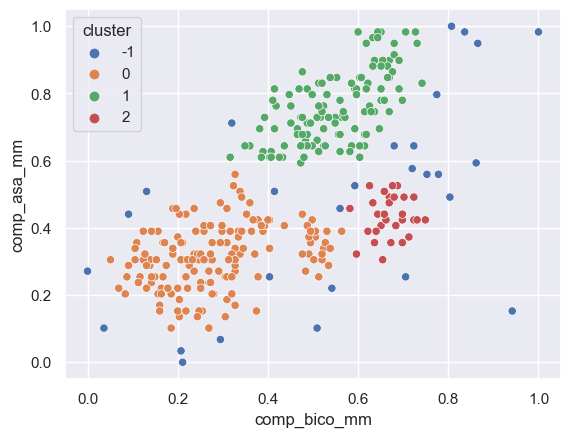

In [26]:
#como o algoritmo classifica os pinguins
#divide em 3 grupos
sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

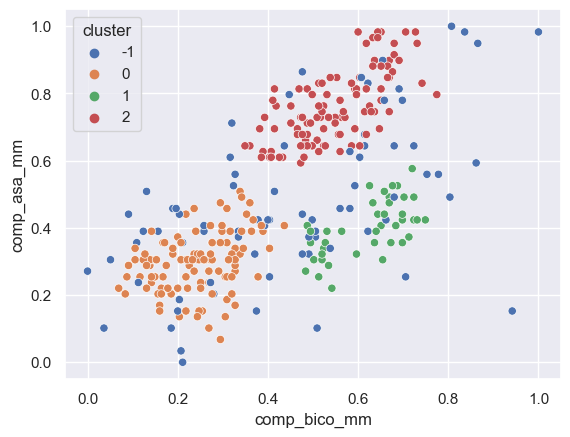

In [27]:
#mudando os parametros
#aqui o fit é em X_ então pega 4 variaveis
db = DBSCAN(eps=.1, min_samples=3).fit(X_)
labels = db.labels_

df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

#com 4 variaveis fica melhor dividido
#continua siplificando pra 2 divisões